# **Data Preprocessing Using Pandas & Scikit-Learn**

### Loading the Dataset 

In [1]:
import pandas as pd
data = pd.read_csv("student_scores.csv")
data.head(10)

,name,hours,score,gender,grades,class
0,Aarav,8,76,M,A,9A
1,Riya,5,62,F,B,9B
2,Kabir,10,88,M,A,10A
3,Sana,4,55,F,C,9A
4,Vivaan,7,72,M,B,10B
5,Ishita,6,64,F,B,9C
6,Rohan,3,48,M,D,9B
7,Meera,9,90,F,A,11A
8,Aditya,2,38,M,F,9C
9,Kavya,11,93,F,A,12A


### Dataset Information

In [2]:
print('Columns:',data.columns.tolist())
print('\nInfo:')
print(data.info())
print('\nDescribe:')
display(data.describe())

Columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Describe:


,hours,score
count,92.000000,92.000000
mean,6.510870,68.836957
std,2.265336,15.692286
min,2.000000,35.000000
25%,5.000000,57.000000
50%,7.000000,70.000000
75%,8.000000,82.000000
max,11.000000,94.000000


### Data Validation 

In [3]:
# checks for the missing values
print(data.isnull().sum()) # for checking the completeness

name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64


In [4]:
# option 1 fill missing values with mean
data["score"] = data["score"].fillna(data["score"].mean())
# option 2 drop rows with missing values
data = data.dropna()

In [5]:
data.shape # checks the size of the dataset

(92, 6)

In [6]:
data.dtypes # checks the datatype consistency

name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object

<Axes: >

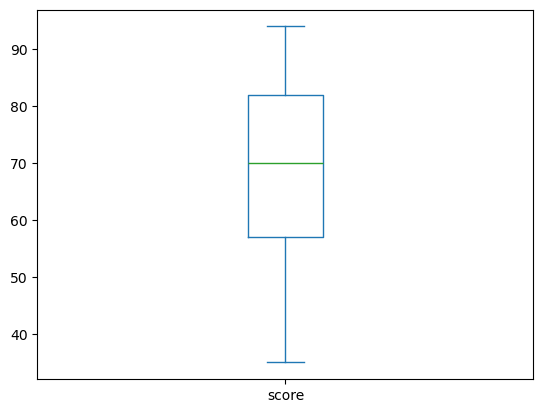

In [7]:
data.describe() # summary stats
data['score'].plot(kind = 'box') # displays outliers(accuracy)

In [8]:
data['score'].max() # maximum score

94

In [9]:
data['score'].min() # minimum score

35

In [10]:
data['grades'].value_counts(normalize = True) # checks bias

grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64

In [11]:
data['class'].value_counts(normalize = False) # checks bias

class
9A     13
10A    11
9B     10
9C     10
10B     8
11A     8
10C     7
12A     6
12B     6
11B     5
12C     5
11C     3
Name: count, dtype: int64

#  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_scores.csv` *(demo dataset)* |
| **Description**     | This is the dataset of the students scores. (Completeness, Consistency, Accuracy, Time-Keeping, Bias). |
| **Features**        | `names`, `hours`, `scores`, `gender`, `grades`,`class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values |
| **Transformations** | Checked the size of the dataset, performed value counts, dtype checks, and boxplot analysis for data quality |
| **Owner**           | Vedashree |
| **Last Updated**    | 2026-02-06 |

### Data Preprocessing 

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["gender"] = le.fit_transform(data["gender"])

print(data.head(10))

     name  hours  score  gender grades class
0   Aarav      8     76       1      A    9A
1    Riya      5     62       0      B    9B
2   Kabir     10     88       1      A   10A
3    Sana      4     55       0      C    9A
4  Vivaan      7     72       1      B   10B
5  Ishita      6     64       0      B    9C
6   Rohan      3     48       1      D    9B
7   Meera      9     90       0      A   11A
8  Aditya      2     38       1      F    9C
9   Kavya     11     93       0      A   12A


## ***Working on Telecom Dataset***

### Load the data

In [13]:
import pandas as pd
telecom_data = pd.read_csv("telecom_dataset.csv",parse_dates=['last_call_time','first_recharge_date'])
telecom_data.head(10)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\2047209762.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  telecom_data = pd.read_csv("telecom_dataset.csv",parse_dates=['last_call_time','first_recharge_date'])


,customer_id,region,plan_type,tenure_months,monthly_charges,total_charges,calls_dropped,support_calls,is_prepaid,complaints_last_30_days,call_drop_ratio,is_ported_out_last_year,days_since_first_recharge,days_since_last_recharge,last_call_time,first_recharge_date,network_issue_flag,data_usage_intensity,days_to_churn_prediction,churn
0,111,Chennai,Postpaid,28,459,17672,3,1,No,5,0.083,No,1728,47,2026-02-06 14:32:00,2020-04-08,Yes,Medium,12,No
1,102,Hyderabad,Basic,11,189,5756,1,0,No,1,0.018,No,1748,6,2026-02-06 09:15:00,2020-03-18,No,Low,67,No
2,101,Chennai,Basic,46,229,17654,2,0,No,3,0.034,No,1475,12,2026-02-06 11:48:00,2020-12-11,Yes,Low,54,No
3,122,Hyderabad,Postpaid,6,389,898,4,4,No,5,0.091,No,113,53,2026-02-06 22:41:00,2021-11-15,No,Medium,5,Yes
4,103,Bangalore,Postpaid,52,429,21496,1,1,No,2,0.020,No,606,8,2026-02-06 08:52:00,2022-05-04,No,Medium,88,No
5,112,Bangalore,Postpaid,14,379,6892,0,1,No,0,0.000,No,1704,5,2026-02-06 10:33:00,2020-04-02,No,Medium,77,No
6,105,Hyderabad,Unlimited,4,779,1352,3,5,Yes,4,0.067,No,768,62,2026-02-06 06:21:00,2021-11-24,Yes,High,9,Yes
7,109,Bangalore,Unlimited,39,699,19500,2,1,Yes,4,0.041,Yes,825,18,2026-02-06 20:44:00,2020-09-27,Yes,High,65,No
8,117,Chennai,Premium,44,999,20636,4,1,No,5,0.082,Yes,1749,27,2026-02-06 13:57:00,2020-03-23,Yes,High,22,No
9,109,Bangalore,Basic,3,219,897,3,4,No,4,0.074,No,1556,4,2026-02-06 07:49:00,2020-09-27,Yes,Low,8,Yes


### Data Preprocessing 

In [14]:
# features = input columns, label = output columns
features = telecom_data.drop(columns = ['churn'])
label = telecom_data['churn']

print("Feature Columns: ")
[print(x) for x in features.columns]
print("\n\nLabel Columns: \n", label.name)

Feature Columns: 
customer_id
region
plan_type
tenure_months
monthly_charges
total_charges
calls_dropped
support_calls
is_prepaid
complaints_last_30_days
call_drop_ratio
is_ported_out_last_year
days_since_first_recharge
days_since_last_recharge
last_call_time
first_recharge_date
network_issue_flag
data_usage_intensity
days_to_churn_prediction


Label Columns: 
 churn


In [15]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customer_id                127 non-null    int64         
 1   region                     127 non-null    object        
 2   plan_type                  127 non-null    object        
 3   tenure_months              127 non-null    int64         
 4   monthly_charges            127 non-null    int64         
 5   total_charges              127 non-null    int64         
 6   calls_dropped              127 non-null    int64         
 7   support_calls              127 non-null    int64         
 8   is_prepaid                 127 non-null    object        
 9   complaints_last_30_days    127 non-null    int64         
 10  call_drop_ratio            127 non-null    float64       
 11  is_ported_out_last_year    127 non-null    object        
 12  days_sin

In [16]:
# seperating categorical and numerical features
categorical = telecom_data.select_dtypes(include = 'object').columns
numerical = telecom_data.select_dtypes(exclude = 'object').columns

print("Categorical Features:", list(categorical))
print("Numerical Features:", list(numerical))

Categorical Features: ['region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'network_issue_flag', 'data_usage_intensity', 'churn']
Numerical Features: ['customer_id', 'tenure_months', 'monthly_charges', 'total_charges', 'calls_dropped', 'support_calls', 'complaints_last_30_days', 'call_drop_ratio', 'days_since_first_recharge', 'days_since_last_recharge', 'last_call_time', 'first_recharge_date', 'days_to_churn_prediction']


### Encoding the Data

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

# label Encoding
le = LabelEncoder()
telecom_data['region_encoded'] = le.fit_transform(telecom_data['region'])
telecom_data[['region', 'region_encoded']].head(5)


,region,region_encoded
0,Chennai,1
1,Hyderabad,3
2,Chennai,1
3,Hyderabad,3
4,Bangalore,0


In [18]:
# Digplay original categorical columns
print("Original categorical columns:", telecom_data.select_dtypes(include= 'object').columns.tolist())
print(telecom_data[['plan_type']])

# One-hot encode the 'plan_type' column
telecom_onehot = pd.get_dummies(telecom_data, columns = ['plan_type'], prefix = 'plan')

#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse=False)
#encoded = encoder.fit_transform(df[['plan_type']])

# Automatically detect new dummy columns 
plan_columns = [col for col in telecom_onehot.columns if col.startswith('plan_')]
print(list(plan_columns))

# Display first few rows of new encoded columns 
print("\nEncoded plan_type columns: \n")
print(telecom_onehot[plan_columns].head())
                                                

Original categorical columns: ['region', 'plan_type', 'is_prepaid', 'is_ported_out_last_year', 'network_issue_flag', 'data_usage_intensity', 'churn']
    plan_type
0    Postpaid
1       Basic
2       Basic
3    Postpaid
4    Postpaid
..        ...
122     Basic
123     Basic
124   Prepaid
125  Postpaid
126  Postpaid

[127 rows x 1 columns]
['plan_Basic', 'plan_Postpaid', 'plan_Premium', 'plan_Prepaid', 'plan_Unlimited']

Encoded plan_type columns: 

   plan_Basic  plan_Postpaid  plan_Premium  plan_Prepaid  plan_Unlimited
0       False           True         False         False           False
1        True          False         False         False           False
2        True          False         False         False           False
3       False           True         False         False           False
4       False           True         False         False           False


### Scaling the data 

In [19]:
scaler = StandardScaler()
telecom_data[['monthly_scaled', 'total_scaled']] = scaler.fit_transform(telecom_data[['monthly_charges', 'total_charges']])
telecom_data[['monthly_charges', 'monthly_scaled', 'total_charges', 'total_scaled']].head() 

,monthly_charges,monthly_scaled,total_charges,total_scaled
0,459,-0.385292,17672,0.955682
1,189,-1.237656,5756,-0.462872
2,229,-1.111380,17654,0.953539
3,389,-0.606275,898,-1.041198
4,429,-0.479999,21496,1.410915


In [21]:
# Extract year, month, and weekday from last_call_time
telecom_data['call_year'] = telecom_data['last_call_time'].dt.year
telecom_data['call_month'] = telecom_data['last_call_time'].dt.month
telecom_data['call_weekday'] = telecom_data['last_call_time'].dt.day_name()

# Calculate days since first recharge
telecom_data['days_since_first_recharge'] = (pd.to_datetime("2025-01-20") - telecom_data['first_recharge_date']).dt.days
telecom_data[['customer_id', 'last_call_time', 'first_recharge_date', 'days_since_first_recharge']].head()

,customer_id,last_call_time,first_recharge_date,days_since_first_recharge
0,111,2026-02-06 14:32:00,2020-04-08,1748
1,102,2026-02-06 09:15:00,2020-03-18,1769
2,101,2026-02-06 11:48:00,2020-12-11,1501
3,122,2026-02-06 22:41:00,2021-11-15,1162
4,103,2026-02-06 08:52:00,2022-05-04,992


In [22]:
telecom_data.drop(['monthly_charges','total_charges'], axis = 1)

,customer_id,region,plan_type,tenure_months,calls_dropped,support_calls,is_prepaid,complaints_last_30_days,call_drop_ratio,is_ported_out_last_year,...,network_issue_flag,data_usage_intensity,days_to_churn_prediction,churn,region_encoded,monthly_scaled,total_scaled,call_year,call_month,call_weekday
0,111,Chennai,Postpaid,28,3,1,No,5,0.083,No,...,Yes,Medium,12,No,1,-0.385292,0.955682,2026,2,Friday
1,102,Hyderabad,Basic,11,1,0,No,1,0.018,No,...,No,Low,67,No,3,-1.237656,-0.462872,2026,2,Friday
2,101,Chennai,Basic,46,2,0,No,3,0.034,No,...,Yes,Low,54,No,1,-1.111380,0.953539,2026,2,Friday
3,122,Hyderabad,Postpaid,6,4,4,No,5,0.091,No,...,No,Medium,5,Yes,3,-0.606275,-1.041198,2026,2,Friday
4,103,Bangalore,Postpaid,52,1,1,No,2,0.020,No,...,No,Medium,88,No,0,-0.479999,1.410915,2026,2,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,102,Hyderabad,Basic,56,1,0,No,2,0.016,No,...,Yes,Medium,14,No,3,1.477282,0.089383,2026,2,Friday
123,102,Hyderabad,Basic,5,1,1,No,2,0.018,No,...,No,Low,111,Yes,3,-1.142949,-0.892748,2026,2,Friday
124,111,Chennai,Prepaid,33,3,1,Yes,4,0.067,No,...,No,Medium,82,No,1,-1.142949,1.151394,2026,2,Friday
125,112,Bangalore,Postpaid,28,0,1,No,1,0.000,No,...,Yes,High,32,No,0,-1.206087,0.261405,2026,2,Friday
